# CPSC5616: Linear Regression

Here's a simple linear regression example in Python using sklearn:

LinearRegression from sklearn.linear_model is a method to perform linear regression (uses the Ordinary Least Squares (OLS) method, which solves the linear regression problem analytically using the Normal Equation)

Parameters: [1.9802119] 1.1300285441478302
Coefficient/slope: 1.9802
Intercept: 1.1300
The predicted y is 14.00 when x is 6.50


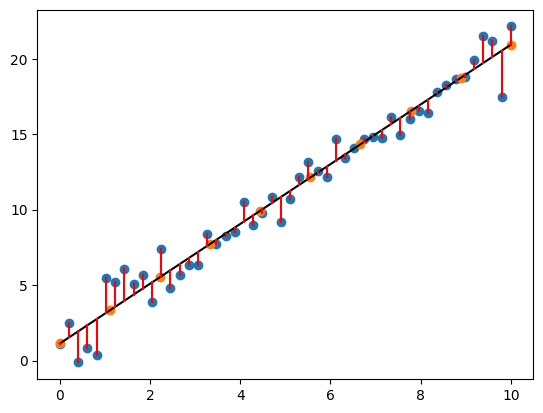

In [ ]:
from pickle import NEWOBJ_EX
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set a random seed for reproducibility
np.random.seed(8)

# Generate synthetic data
n = 50   # Number of data points
x = np.linspace(0, 10, n)               # Linearly spaced set of n numbers between 0 and 10
y = x*2 + 1 + 1*np.random.randn(n)      # Generate y values using the equation y = 2x + 1 + Gaussian noise (normal distribution)
plt.plot(x, y, 'o')                     # Plot the original data points as blue circles

# Initialize and fit a linear regression model to the data
model = LinearRegression(fit_intercept=True)  # Create a linear regression model instance with intercept
"""
Many functions and methods in libraries like scikit-learn expect input features
to be in a two-dimensional array where each row is a sample and each column is a feature.
Even if you have just one feature (as in this linear regression example),
it still needs to be provided in a 2D array format with one column.
That's why reshaping the 1D array x into a 2D array x[:, np.newaxis] is necessary.
"""
model.fit(x[:, np.newaxis], y)                # Fit the model using x as the predictor and y as the response

xfit = np.linspace(0, 10, 10)                     # New set of x values for prediction, so that we could draw the y
yfit = model.predict(xfit[:, np.newaxis])          # Predict y values for the new x values based on the model
plt.plot(xfit, yfit, 'o')

plt.plot(xfit, yfit, color="black")     # Plot the predicted line in black
# Draw red line segments from each data point to the regression line, showing residuals
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red")

# Print the model's parameters
print("Parameters:", model.coef_, model.intercept_)
print(f"Coefficient/slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

new_x= 6.5
pred_y = new_x*model.coef_[0]+model.intercept_
print(f"The predicted y is {pred_y:.2f} when x is {new_x:.2f}")
plt.show()


In this case, the coefficient is the slope of the fitted line, and the intercept is the point where the fitted line intersects with the y-axis.

# Evaluate the model with metrics commonly used

**The Mean Squared Error (MSE)** measures the average squared difference between the observed actual outcomes and the outcomes predicted by the model. Smaller MSE values indicate a better fit to the data, but this metric can be scale-dependent. Larger errors are penalized more than smaller ones. This makes models sensitive to outliers

**The R-squared** (coefficient of determination) value represents the proportion of the variance in the dependent variable that is predictable from the independent variable. It provides a measure of how well observed outcomes are replicated by the model. An R-squared value of 1 indicates that the regression predictions perfectly fit the data.

**Root Mean Squared Error (RMSE)** is the square root of the MSE. It has the benefit of being in the **same units as the target variable**, which can sometimes make it more interpretable than the MSE.

**Mean Absolute Error (MAE)**: This is the average of the absolute differences between the predicted and actual values. It provides a linear penalty for each unit of difference, rather than the squared penalty of the MSE.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(x[:, np.newaxis])    # Predicted y values for the original x values
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

r2 = model.score(x[:, np.newaxis], y)
print(f"R-squared: {r2:.4f}")

rmse = np.sqrt(mse)    # Compute RMSE from the MSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 1.2756
R-squared: 0.9638
Mean Squared Error (MSE): 1.2756
Root Mean Squared Error (RMSE): 1.1294
Mean Absolute Error (MAE): 0.8750
